# Proyek Klasifikasi Gambar: [tire-texture-image-recognition]
- **Nama:** [Irfani Azis]
- **Email:** [Azis56190@gmail.com]
- **ID Dicoding:** [Azis]

In [38]:
!pip show os
!pip show shutil
!pip show zipfile
!pip show random
!pip show pathlib
!pip show numpy
!pip show pandas
!pip show tqdm
!pip show matplotlib
!pip show seaborn
!pip show cv2
!pip show skimage
!pip show tensorflow

Name: pathlib
Version: 1.0.1
Summary: Object-oriented filesystem paths
Home-page: https://pathlib.readthedocs.org/
Author: Antoine Pitrou
Author-email: solipsis@pitrou.net
License: MIT License
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 
Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are
        met:
        
            * Redistributions of source code must retain the above copyright
               notice, this list of conditions and the following disclaimer.
        
            * Redistributions in binary form must reproduce the above
               copyright notice, this list of conditions and the fol

# **Import Libraries**

In [3]:
# Mengimpor libraries umum yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq

# Mengimpor libraries untuk visualisasi
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# Mengimpor libraries untuk pemrosesan data gambar
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

# Mengimpor libraries untuk pembuatan dan evaluasi model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau

# Mengabaikan peringatan
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **Data Loading**

In [4]:
# Menyimpan API token di ~/.kaggle/kaggle.json
import json
os.makedirs('/root/.kaggle/', exist_ok=True)

api_token = {"username":"azis56190","key":"37bd6ae858dddaafe65baa6c51292f59"}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

# Atur izin
os.chmod('/root/.kaggle/kaggle.json', 600)

In [5]:
# Download kaggle dataset and unzip the file
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d jehanbhathena/tire-texture-image-recognition
!unzip tire-texture-image-recognition.zip

Dataset URL: https://www.kaggle.com/datasets/jehanbhathena/tire-texture-image-recognition
License(s): CC0-1.0
tire-texture-image-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  tire-texture-image-recognition.zip
replace Tire Textures/testing_data/cracked/Cracked-1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Tire Textures/testing_data/cracked/Cracked-1.jpg  
  inflating: Tire Textures/testing_data/cracked/Cracked-10.jpg  
  inflating: Tire Textures/testing_data/cracked/Cracked-105.jpg  
  inflating: Tire Textures/testing_data/cracked/Cracked-11.jpg  
  inflating: Tire Textures/testing_data/cracked/Cracked-13.jpg  
  inflating: Tire Textures/testing_data/cracked/Cracked-14.jpg  
  inflating: Tire Textures/testing_data/cracked/Cracked-15.jpg  
  inflating: Tire Textures/testing_data/cracked/Cracked-19.jpg  
  inflating: Tire Textures/testing_data/cracked/Cracked-2.jpg  
  inflating: Tire Textures/testing_data/crack

## **Gabungkan Data Train dan Data Test ke Direktori yang Sama**

In [6]:
import os
import shutil

# Direktori awal untuk train dan test
train_dir = "Tire Textures/training_data"
test_dir = "Tire Textures/testing_data"

# Direktori baru untuk dataset gabungan
combined_dir = "Tire Textures/dataset"

# Buat direktori baru untuk dataset gabungan
os.makedirs(combined_dir, exist_ok=True)



In [7]:
# Salin file dan folder dari train
for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)
# Salin file dan folder dari test
for category in os.listdir(test_dir):
    category_dir = os.path.join(test_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

## **Plot gambar sampel untuk semua kelas**

In [8]:
# Membuat kamus yang menyimpan gambar untuk setiap kelas dalam data
lung_image = {}

# Tentukan path sumber train
path = "Tire Textures/"
path_sub = os.path.join(path, "dataset")
for i in os.listdir(path_sub):
    lung_image[i] = os.listdir(os.path.join(path_sub, i))

In [9]:
lung_image

{'cracked': ['IMG_4486.jpg',
  'IMG_4502.jpg',
  'IMG_4405.jpg',
  'Cracked-229.jpg',
  'IMG_4335.jpg',
  'IMG_4376.jpg',
  'Untitled-1.jpg',
  'IMG_4417.jpg',
  'IMG_4393.jpg',
  'Cracked-30.jpg',
  'Untitled-354.jpg',
  'Cracked-36.jpg',
  'Untitled-16.jpg',
  'Untitled-428.jpg',
  'IMG_4432.jpg',
  'IMG_4334.jpg',
  'Cracked-246.jpg',
  'IMG_4280.jpg',
  'IMG_4403.jpg',
  'Untitled-411.jpg',
  'Untitled-425.jpg',
  'IMG_4495.jpg',
  'IMG_4377.jpg',
  'NewCracked34.jpg',
  'IMG_4437.jpg',
  'Untitled-392.jpg',
  'Cracked-216.jpg',
  'IMG_4465.jpg',
  'Cracked-386.jpg',
  'IMG_4381.jpg',
  'IMG_4276.jpg',
  'Cracked-153.jpg',
  'Cracked-9.jpg',
  'Cracked-22.jpg',
  'Untitled-10.jpg',
  'IMG_4313.jpg',
  'Untitled-382.jpg',
  'Cracked-66.jpg',
  'Untitled-18.jpg',
  'Cracked-215.jpg',
  'Untitled-386.jpg',
  'IMG_4274.jpg',
  'NewCracked31.jpg',
  'Untitled-371.jpg',
  'IMG_4476.jpg',
  'Untitled-32.jpg',
  'IMG_4450.jpg',
  'Cracked-281.jpg',
  'Untitled-14.jpg',
  'Cracked-133.jpg',

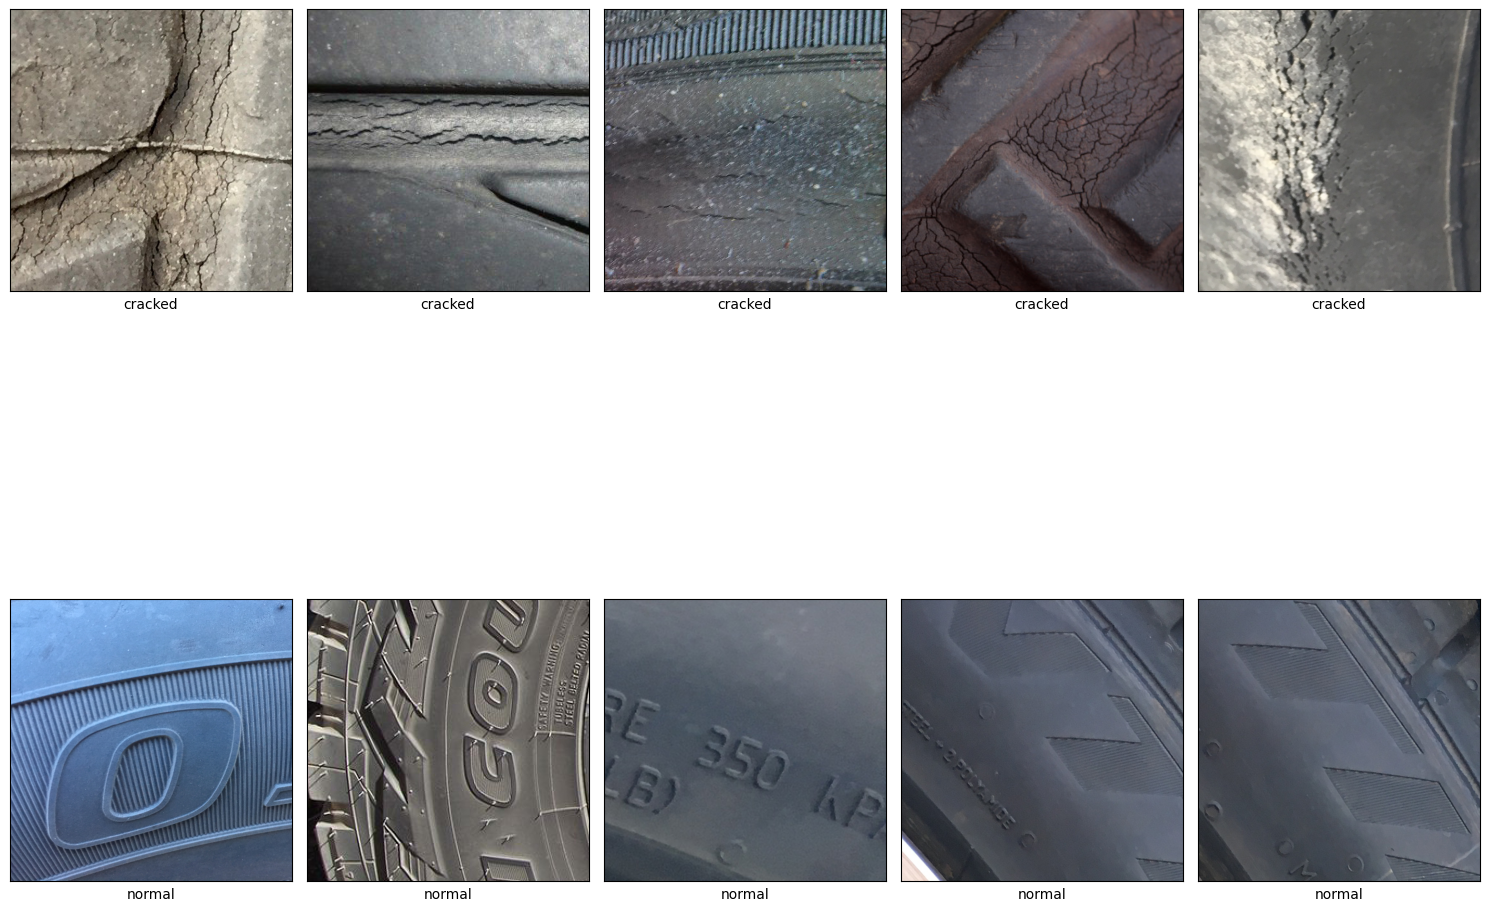

In [10]:
# Menampilkan secara acak 5 gambar di bawah setiap dari 2 kelas dari data.
# Anda akan melihat gambar yang berbeda setiap kali.
path_sub = "Tire Textures/dataset/"

# Menampilkan secara acak 5 gambar di bawah setiap kelas dari data latih
fig, axs = plt.subplots(len(lung_image.keys()), 5, figsize=(15, 15))

for i, class_name in enumerate(os.listdir(path_sub)):
    images = np.random.choice(lung_image[class_name], 5, replace=False)

    for j, image_name in enumerate(images):
        img_path = os.path.join(path_sub, class_name, image_name)
        #img = Image.open(img_path).convert("L")  # Konversi menjadi skala keabuan
        #axs[i, j].imshow(img, cmap='gray')
        img = Image.open(img_path)  # Konversi menjadi skala keabuan
        axs[i, j].imshow(img)
        axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])


fig.tight_layout()

## **Plot distribusi gambar di seluruh kelas**

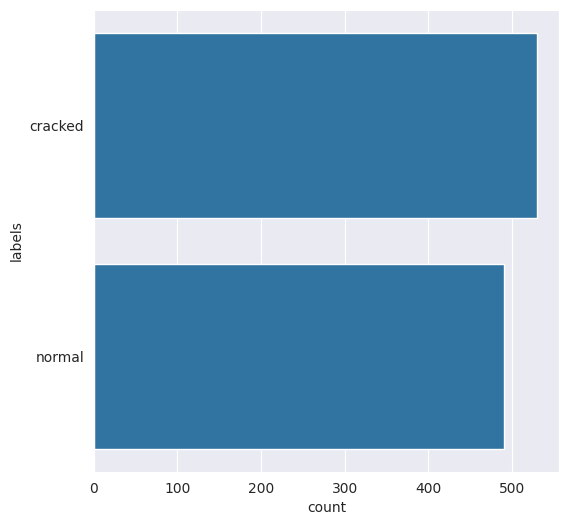

In [11]:
# Define source path
lung_path = "Tire Textures/dataset/"

# Create a list that stores data for each filenames, filepaths, and labels in the data
file_name = []
labels = []
full_path = []

# Get data image filenames, filepaths, labels one by one with looping, and store them as dataframe
for path, subdirs, files in os.walk(lung_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

distribution_train = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})

# Plot the distribution of images across the classes
Label = distribution_train['labels']
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

# **Data Augmentation**

Proses augmentasi gambar adalah teknik yang digunakan untuk membuat variasi baru dari setiap gambar dalam dataset, sehingga model memiliki lebih banyak variasi untuk dipelajari. Ini membantu mencegah overfitting, di mana model terlalu terbiasa dengan data pelatihan dan tidak dapat menggeneralisasi dengan baik ke data baru.

Berikut adalah beberapa strategi augmentasi gambar yang dapat kita terapkan:

- `anticlockwise_rotation` adalah ketika gambar diputar ke arah berlawanan dengan arah jarum jam.
- `clockwise_rotation` adalah ketika gambar diputar ke arah searah dengan arah jarum jam.
- `flip_up_down` adalah ketika gambar dibalik secara vertikal dari atas ke bawah.
- `sheared` adalah ketika gambar diberikan efek pergeseran acak.
- `blur` adalah ketika gambar diberikan efek kabur atau blur.
- `wrap_shift` adalah ketika gambar diberikan efek pergeseran melengkung.
- `brightness` adalah ketika gambar diberikan efek peningkatan kecerahan.

In [12]:
# Membuat fungsi untuk melakukan rotasi berlawanan arah jarum jam
def anticlockwise_rotation(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224,224))
    sudut = random.randint(0,180)
    return rotate(img, sudut)

# Membuat fungsi untuk melakukan rotasi searah jarum jam
def clockwise_rotation(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224,224))
    sudut = random.randint(0,180)
    return rotate(img, -sudut)

# Membuat fungsi untuk membalik gambar secara vertikal dari atas ke bawah
def flip_up_down(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224,224))
    return np.flipud(img)

# Membuat fungsi untuk memberikan efek peningkatan kecerahan pada gambar
def add_brightness(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224,224))
    img = adjust_gamma(img, gamma=0.5,gain=1)
    return img

# Membuat fungsi untuk memberikan efek blur pada gambar
def blur_image(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224,224))
    return cv2.GaussianBlur(img, (9,9),0)

# Membuat fungsi untuk memberikan efek pergeseran acak pada gambar
def sheared(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224,224))
    transform = AffineTransform(shear=0.2)
    shear_image = warp(img, transform, mode="wrap")
    return shear_image

# Membuat fungsi untuk melakukan pergeseran melengkung pada gambar
def warp_shift(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224,224))
    transform = AffineTransform(translation=(0,40))
    warp_image = warp(img, transform, mode="wrap")
    return warp_image

In [13]:
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

transformations = {
    'rotate anticlockwise': anticlockwise_rotation,
    'rotate clockwise': clockwise_rotation,
    'warp shift': warp_shift,
    'blurring image': blur_image,
    'add brightness': add_brightness,
    'flip up down': flip_up_down,
    'shear image': sheared
}

images_path = "Tire Textures/dataset/normal"  # Path for the original image
augmented_path = "Tire Textures/dataset/NORMAL_augmented"  # Path to put the augmented image
images = []  # To save images that have been preprocessed from the folder

# Baca nama gambar dari folder dan tambahkan path ke dalam array "images"
for im in os.listdir(images_path):
    images.append(os.path.join(images_path, im))

# Jumlah gambar yang akan ditambahkan dengan hasil transformasi augmentasi
images_to_generate = 2000
i = 1

while i <= images_to_generate:
    image = random.choice(images)
    try:
        original_image = io.imread(image)

        # Memeriksa apakah gambar memiliki dimensi yang valid (3 atau 4 dimensi)
        if original_image.ndim not in [3, 4]:
            raise ValueError('Invalid image dimensions')

        transformed_image = None
        n = 0  # Variabel untuk melakukan iterasi sampai jumlah transformasi yang akan diterapkan
        transformation_count = random.randint(1, len(transformations))  # Pilih jumlah transformasi acak yang akan diterapkan pada gambar

        while n <= transformation_count:
            key = random.choice(list(transformations))  # Secara acak memilih dan memanggil metode
            transformed_image = transformations[key](original_image)
            n = n + 1

        new_image_path = "%s/augmented_image_%s.jpg" % (augmented_path, i)
        transformed_image = img_as_ubyte(transformed_image)  # Mengonversi gambar ke format byte yang tidak ditandatangani, dengan nilai dalam [0, 255]
        cv2.imwrite(new_image_path, transformed_image)  # Simpan hasil transformasi augmentasi pada gambar ke path yang ditentukan
        i = i + 1
    except ValueError as e:
        print('Could not read or process the image', image, ':', e, 'hence skipping it.')

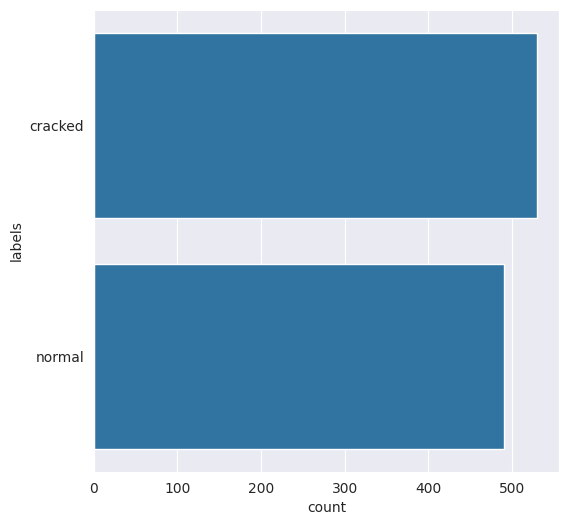

In [14]:
# Define source path
lung_path = "Tire Textures/dataset/"

# Create a list that stores data for each filenames, filepaths, and labels in the data
file_name = []
labels = []
full_path = []

# Get data image filenames, filepaths, labels one by one with looping, and store them as dataframe
for path, subdirs, files in os.walk(lung_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

distribution_train = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})

# Plot the distribution of images across the classes
Label = distribution_train['labels']
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

# **Data Splitting : Training and Testing**

In [15]:
# Panggil variabel mypath yang menampung folder dataset gambar
mypath= 'Tire Textures/dataset/'

file_name = []
labels = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)


# Memasukan variabel yang sudah dikumpulkan pada looping di atas menjadi sebuah dataframe agar rapih
df = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})
# Melihat jumlah data gambar pada masing-masing label
df.groupby(['labels']).size()

,0
labels,
cracked,530
normal,491


In [16]:
# Variabel yang digunakan pada pemisahan data ini dimana variabel x = data path dan y = data labels
X= df['path']
y= df['labels']

# Split dataset awal menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=300)

In [17]:
# Menyatukan kedalam masing-masing dataframe
df_tr = pd.DataFrame({'path':X_train,'labels':y_train,'set':'training_data'})
df_te = pd.DataFrame({'path':X_test,'labels':y_test,'set':'testing_data'})

In [18]:
# Print hasil diatas untuk melihat panjang size data training dan testing
print('train size', len(df_tr))
print('test size', len(df_te))

train size 816
test size 205


In [19]:
# Gabungkan DataFrame df_tr dan df_te
df_all = pd.concat([df_tr, df_te], ignore_index=True)

print('===================================================== \n')
print(df_all.groupby(['set', 'labels']).size(), '\n')
print('===================================================== \n')

# Cek sample data
print(df_all.sample(5))


set            labels 
testing_data   cracked    108
               normal      97
training_data  cracked    422
               normal     394
dtype: int64 


                                               path   labels            set
700  Tire Textures/dataset/cracked/Untitled-350.jpg  cracked  training_data
215      Tire Textures/dataset/cracked/IMG_4377.jpg  cracked  training_data
745   Tire Textures/dataset/normal/NewNormal161.jpg   normal  training_data
70   Tire Textures/dataset/cracked/Untitled-356.jpg  cracked  training_data
566      Tire Textures/dataset/cracked/IMG_4471.jpg  cracked  training_data


In [20]:
# Memanggil dataset asli yang berisi keseluruhan data gambar yang sesuai dengan labelnya
datasource_path = "Tire Textures/dataset/"
# Membuat variabel Dataset, dimana nanti menampung data yang telah dilakukan pembagian data training dan testing
dataset_path = "Dataset-Final/"

In [21]:
for index, row in tq(df_all.iterrows()):
    # Deteksi filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['labels'],row['image'].split('.')[0])

    # Buat direktori tujuan folder
    if os.path.exists(os.path.join(dataset_path,row['set'],row['labels'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['labels']))

    # Tentukan tujuan file
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['labels'],destination_file_name)

    # Salin file dari sumber ke tujuan
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

# **Image Data Generator**

In TensorFlow you can do this through the `tf.keras.preprocessing.image.ImageDataGenerator` class. This class allows you to do:
- Configure the random transformation and normalization operations to be performed on the image data during training
- Instantiate generator of augmented image sets (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. This generator can then be used with `tf.keras` model methods which accept generator data as input, `fit`, `evaluate` and `predict`

Prepare the training and validation data, to begin with using `.flow_from_directory()` which generates image datasets and their labels directly in their respective folders by setting the `WIDTH` and `HEIGHT` size, predefined `BATCH SIZE` size and mode its class. Here we use `"binary"` class mode because the number of classes used is 2.

In [22]:
# Define training and test directories
TRAIN_DIR = "Dataset-Final/training_data/"
TEST_DIR = "Dataset-Final/testing_data/"

train_normal = os.path.join(TRAIN_DIR + '/normal')
train_cracked = os.path.join(TRAIN_DIR + '/cracked')
test_normal = os.path.join(TEST_DIR + '/normal')
test_cracked = os.path.join(TEST_DIR + '/cracked')

print("Total number of normal images in training set: ",len(os.listdir(train_normal)))
print("Total number of cracked images in training set: ",len(os.listdir(train_cracked)))
print("Total number of normal images in test set: ",len(os.listdir(test_normal)))
print("Total number of cracked images in test set: ",len(os.listdir(test_cracked)))

Total number of normal images in training set:  394
Total number of cracked images in training set:  422
Total number of normal images in test set:  97
Total number of cracked images in test set:  108


In [23]:
# Create an ImageDataGenerator object normalizing the images
datagen = ImageDataGenerator(rescale=1/255.,
                             validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(TRAIN_DIR,
                                              batch_size=32,
                                              target_size=(150,150),
                                              color_mode="grayscale",
                                              class_mode='binary',
                                              subset='training',
                                              shuffle=True)

validation_generator = datagen.flow_from_directory(TRAIN_DIR,
                                                   batch_size=32,
                                                   target_size=(150,150),
                                                   color_mode="grayscale",
                                                   class_mode='binary',
                                                   subset='validation',
                                                   shuffle=False)

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  batch_size=1,
                                                  target_size=(150,150),
                                                  color_mode="grayscale",
                                                  class_mode='binary',
                                                  shuffle=False)

Found 654 images belonging to 2 classes.
Found 162 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


# **Model Exp 1 - CNN Architecture (Using 32 Neurons in Conv Layer):**

In [24]:
# tf.keras.backend.clear_session()

####################### Init sequential model ##################################
model_1 = Sequential()

# ######################### Input layer with Fully Connected Layer ################################
# 1st Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150,150,1)))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))

# 2nd Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(32, (4, 4),padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))

# 3rd Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))

# Flatten layer
model_1.add(Flatten())
# 1nd Dense Layer
model_1.add(Dense(128, activation = 'relu'))
# 1nd Dropout Layer
model_1.add(Dropout(0.5))
# 2nd Dense Layer
model_1.add(Dense(64, activation = 'relu'))
# 2nd Dropout Layer
model_1.add(Dropout(0.3))

# Final Dense layer => For output prediction 1 mean (binary class in dataset), sigmoid for binary cases
model_1.add(Dense(1, activation='sigmoid'))
######################### Fully Connected Layer ################################

######################### Compile Model ################################
model_1.compile(optimizer=tf.keras.optimizers.RMSprop(),
                loss='binary_crossentropy',
                metrics=['accuracy'])

# Summary of the Model Architecture
print(model_1.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 32)          │          50,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 37, 37, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10368)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,327,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,402,881 (5.35 MB)

 Trainable params: 1,402,689 (5.35 MB)

 Non-trainable params: 192 (768.00 B)

None


In [27]:
count_normal, count_cracked = len(os.listdir(train_normal)), len(os.listdir(train_cracked))
weight_0 = (1 / count_normal) * (count_normal + count_cracked) / 2.0
weight_1 = (1 / count_cracked) * (count_cracked + count_normal) / 2.0

class_weights = {0 : weight_0, 1 : weight_1}

%time
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.85 and logs.get('val_accuracy') > 0.85):
          print("\nAkurasi telah mencapai >85%")
          self.model.stop_training = True

callbacks = myCallback()

# Fitting / training model
history_1 = model_1.fit(train_generator,
                        epochs=30,
                        batch_size=32,
                        validation_data=validation_generator,
                        class_weight = class_weights,
                        callbacks=callbacks
                        )

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs
Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.7219 - loss: 0.5994 - val_accuracy: 0.4815 - val_loss: 0.7854
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.7540 - loss: 0.4960 - val_accuracy: 0.5123 - val_loss: 1.1761
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.7490 - loss: 0.5461 - val_accuracy: 0.5185 - val_loss: 0.7916
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.7323 - loss: 0.5051 - val_accuracy: 0.5185 - val_loss: 0.9825
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.7702 - loss: 0.4907 - val_accuracy: 0.5185 - val_loss: 0.8367
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.7938 - loss: 0.4882 - val_accuracy: 0.5741 - val_loss: 0.6718
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.7989 - loss: 0.5069 - val_accuracy: 0.5432 - val_loss: 1.0273
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - ac

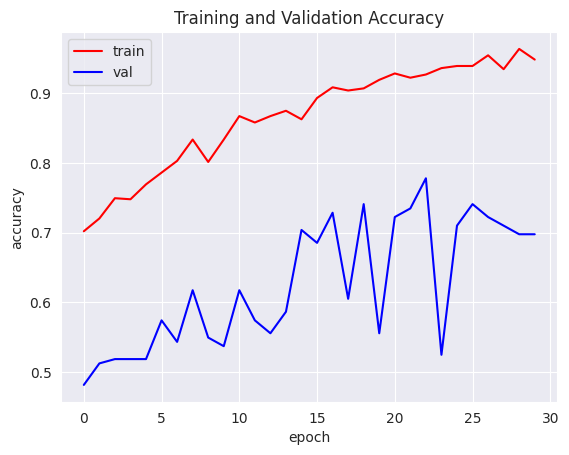

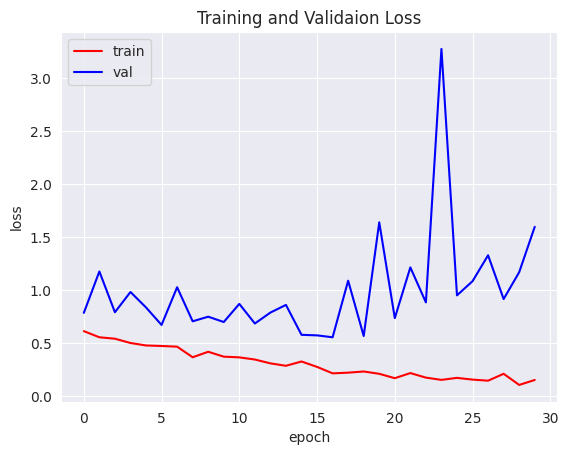

In [28]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()



              precision    recall  f1-score   support

      Normal     0.7422    0.8796    0.8051       108
     Cracked     0.8312    0.6598    0.7356        97

    accuracy                         0.7756       205
   macro avg     0.7867    0.7697    0.7704       205
weighted avg     0.7843    0.7756    0.7722       205



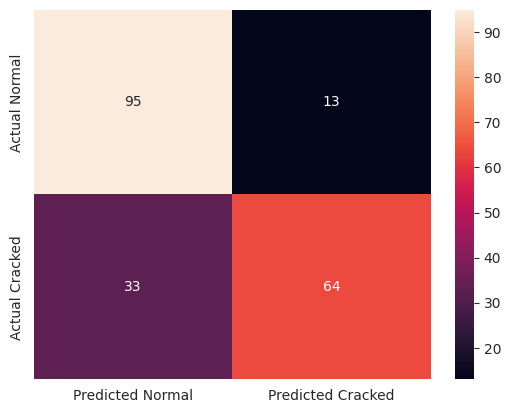

In [29]:
test_generator.reset()

preds_1 = model_1.predict(test_generator,verbose=0)
preds_1 = preds_1.copy()
preds_1[preds_1 <= 0.5] = 0
preds_1[preds_1 > 0.5] = 1

# Print Confusion Matrix
cm = pd.DataFrame(data=confusion_matrix(test_generator.classes, preds_1, labels=[0, 1]),index=["Actual Normal", "Actual Cracked"],
columns=["Predicted Normal", "Predicted Cracked"])
sns.heatmap(cm,annot=True,fmt="d")

# Print Classification Report
print("\n")
print(classification_report(y_true=test_generator.classes,y_pred=preds_1,target_names =['Normal','Cracked'], digits=4))

#Simpan model sebagai SavedModel

In [30]:
# Mendapatkan class names dari train generator
class_indices = train_generator.class_indices

# Mengubah dictionary class_indices menjadi list class names
class_names = list(class_indices.keys())
print(class_names)

['cracked', 'normal']


In [31]:
# Simpan model ke format SavedModel
tf.saved_model.save(model_1, "saved_model")

#Mengonversi Model ke TensorFlow Lite

In [32]:
model_1.save('my_model.keras')

In [33]:
# Muat model yang telah disimpan dalam format .keras
model = tf.keras.models.load_model('my_model.keras')


os.makedirs('tflite', exist_ok=True)

# Konversi model ke format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TFLite ke file
with open('tflite/model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp1czjbd0v'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134705188984384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134702389984448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134702389816912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134702389814096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134702389813040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134702389811280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134702389820080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134702389813568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134702389334032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134702389338784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134702389332976

In [34]:
with open('tflite/label.txt', 'w') as f:
  for label in class_names:
    f.write(label + '\n')

#Mengonversi Model ke TensorFlow.js

In [35]:
# Instal TensorFlow.js converter
!pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 717.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 16.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-d

In [36]:
# Konversi SavedModel ke format TFJS
import os
os.makedirs('tfjs_model', exist_ok=True)

In [37]:
!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model saved_model tfjs_model/

2024-08-05 04:32:57.037099: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-05 04:32:57.108771: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-05 04:32:57.108948: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-05 04:33:00.161633: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# **Model Exp 2 - CNN Architecture Using 64 Neurons in Conv Layer:**

1. Add 3 convolutional layers with each layer have 64 neurons, first filter 3x3, second filter 4x4, third filter 7x7, max pool layers 2x2, and batch normalization layers  
2. Add flatten layer, dense layers, and dropout layers
3. Use Relu as an activation function
4. Take the loss function as binary cross-entropy
5. Take rmsprop as an optimizer
6. Use early stopping with the patience of two epochs and monitor the validation loss or accuracy
7. Try with 30 numbers epoch
8. Train the model using a generator and test the accuracy of the test data at every epoch
9. Plot the training and validation accuracy, and the loss
10. Observe the precision, recall, the F1-score for all classes and determine if the model’s classes are good


In [ ]:
# tf.keras.backend.clear_session()

####################### Init sequential model ##################################
model_2 = Sequential()

# ######################### Input layer with Fully Connected Layer ################################
# 1st Convolutional layer, Batch Normalization layer, and Pooling layer
model_2.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(150,150,1)))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D((2, 2)))

# 2nd Convolutional layer, Batch Normalization layer, and Pooling layer
model_2.add(Conv2D(64, (4, 4),padding='same', activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D((2, 2)))

# 3rd Convolutional layer, Batch Normalization layer, and Pooling layer
model_2.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D((2, 2)))

# Flatten layer
model_2.add(Flatten())
# 1nd Dense Layer
model_2.add(Dense(128, activation = 'relu'))
# 1nd Dropout Layer
model_2.add(Dropout(0.5))
# 2nd Dense Layer
model_2.add(Dense(64, activation = 'relu'))
# 2nd Dropout Layer
model_2.add(Dropout(0.3))
# Final Dense layer => For output prediction 1 mean (binary class in dataset), sigmoid for binary cases
model_2.add(Dense(1, activation='sigmoid'))
######################### Fully Connected Layer ################################

######################### Compile Model ################################
model_2.compile(optimizer=tf.keras.optimizers.RMSprop(),
                            loss='binary_crossentropy',
                            metrics=['accuracy'])

# Summary of the Model Architecture
print(model_2.summary())

In [ ]:
count_normal, count_cracked = len(os.listdir(train_normal)), len(os.listdir(train_cracked))
weight_0 = (1 / count_normal) * (count_normal + count_cracked) / 2.0
weight_1 = (1 / count_cracked) * (count_cracked + count_normal) / 2.0

class_weights = {0 : weight_0, 1 : weight_1}

%time

# Fitting / training model
history_2 = model_2.fit(train_generator,
                        epochs=30,
                        batch_size=32,
                        validation_data=validation_generator,
                        class_weight = class_weights,
                        )

In [ ]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

In [ ]:
test_generator.reset()

preds_2 = model_2.predict(test_generator,verbose=0)
preds_2 = preds_2.copy()
preds_2[preds_2 <= 0.5] = 0
preds_2[preds_2 > 0.5] = 1

# Print Confusion Matrix
cm = pd.DataFrame(data=confusion_matrix(test_generator.classes, preds_2, labels=[0, 1]),index=["Actual Normal", "Actual Cracked"],
columns=["Predicted Cracked", "Predicted Cracked"])
sns.heatmap(cm,annot=True,fmt="d")

# Print Classification Report
print("\n")
print(classification_report(y_true=test_generator.classes,y_pred=preds_2,target_names =['Normal','Cracked'], digits=4))

# **Model Exp 3 - CNN Architecture Using 128 Neurons in Conv Layer:**

1. Add 3 convolutional layers with each layer have 128 neurons, first filter 3x3, second filter 4x4, third filter 7x7, max pool layers 2x2, and batch normalization layers  
2. Add flatten layer, dense layers, and dropout layers
3. Use Relu as an activation function
4. Take the loss function as binary cross-entropy
5. Take rmsprop as an optimizer
6. Use early stopping with the patience of two epochs and monitor the validation loss or accuracy
7. Try with 30 numbers epoch
8. Train the model using a generator and test the accuracy of the test data at every epoch
9. Plot the training and validation accuracy, and the loss
10. Observe the precision, recall, the F1-score for all classes and determine if the model’s classes are good



In [ ]:
# tf.keras.backend.clear_session()

####################### Init sequential model ##################################
model_3 = Sequential()

# ######################### Input layer with Fully Connected Layer ################################
# 1st Convolutional layer, Batch Normalization layer, and Pooling layer
model_3.add(Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(150,150,1)))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D((2, 2)))

# 2nd Convolutional layer, Batch Normalization layer, and Pooling layer
model_3.add(Conv2D(128, (4, 4),padding='same', activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D((2, 2)))

# 3rd Convolutional layer, Batch Normalization layer, and Pooling layer
model_3.add(Conv2D(128, (7, 7), padding='same', activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D((2, 2)))

# Flatten layer
model_3.add(Flatten())
# 1nd Dense Layer
model_3.add(Dense(128, activation = 'relu'))
# 1nd Dropout Layer
model_3.add(Dropout(0.5))
# 2nd Dense Layer
model_3.add(Dense(64, activation = 'relu'))
# 2nd Dropout Layer
model_3.add(Dropout(0.3))
# Final Dense layer => For output prediction 1 mean (binary class in dataset), sigmoid for binary cases
model_3.add(Dense(1, activation='sigmoid'))
######################### Fully Connected Layer ################################

######################### Compile Model ################################
model_3.compile(optimizer=tf.keras.optimizers.RMSprop(),
                            loss='binary_crossentropy',
                            metrics=['accuracy'])

# Summary of the Model Architecture
print(model_3.summary())

In [ ]:
count_normal, count_cracked = len(os.listdir(train_normal)), len(os.listdir(train_cracked))
weight_0 = (1 / count_normal) * (count_normal + count_cracked) / 2.0
weight_1 = (1 / count_cracked) * (count_cracked + count_normal) / 2.0

class_weights = {0 : weight_0, 1 : weight_1}

%time

# Fitting / training model
history_3 = model_3.fit(train_generator,
                        epochs=30,
                        batch_size=32,
                        validation_data=validation_generator,
                        class_weight = class_weights)

In [ ]:
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

In [ ]:
test_generator.reset()

preds_3 = model_3.predict(test_generator,verbose=0)
preds_3 = preds_3.copy()
preds_3[preds_3 <= 0.5] = 0
preds_3[preds_3 > 0.5] = 1

# Print Confusion Matrix
cm = pd.DataFrame(data=confusion_matrix(test_generator.classes, preds_3, labels=[0, 1]),index=["Actual Normal", "Actual Cracked"],
columns=["Predicted Normal", "Predicted Cracked"])
sns.heatmap(cm,annot=True,fmt="d")

# Print Classification Report
print("\n")
print(classification_report(y_true=test_generator.classes,y_pred=preds_3,target_names =['Normal','Cracked'], digits=4))

# **Model Exp 4 - CNN Architecture (Using Learning Rate 0.001):**

From the evaluation results of the two models, we can consider some key performance metrics such as precision, recall, and f1-score to determine the best model based on specific needs.

Model 1:

Normal Precision: 0.9941 <br>
Normal Recall: 0.9479 <br>
F1-score Normal: 0.9704 <br>
Precision Pneumonia: 0.9587 <br>
Recall Pneumonia: 0.9954 <br>
F1-score Pneumonia: 0.9767 <br>
Accuracy: 0.9739


Model 2:

Precision Normal: 0.9691 <br>
Recall Normal: 0.9732 <br>
F1-score Normal: 0.9712 <br>
Precision Pneumonia: 0.9779 <br>
Recall Pneumonia: 0.9745 <br>
F1-score Pneumonia: 0.9762 <br>
Accuracy: 0.9739 <br>
Both models have the same accuracy (0.9739), but there are differences in the precision, recall, and f1-score metrics for the Normal and Pneumonia classes.

<br>

Considerations:

If we focus on the Normal class:

*   Model 1 has a higher precision (0.9941 vs 0.9691).
*   Model 1 has a slightly lower recall (0.9479 vs 0.9732).
*   The F1-score for the Normal class is slightly higher in Model 1 (0.9704 vs 0.9712).

If we focus on the Pneumonia class:
*   Model 1 has a higher recall (0.9954 vs 0.9745).
*   Precision for the Pneumonia class is almost the same between the two models.
*   The F1-score for the Pneumonia class is slightly higher in Model 1 (0.9767 vs 0.9762).

<br>

Conclusion:

*   If the main priority is to optimize Pneumonia detection (minority class), Model 1 may be more desirable as it has a higher recall for the Pneumonia class.
*   If the main concern is to maintain Normal classification precision, Model 1 also gives better results in terms of precision for the Normal class.

<br>

1. Add 3 convolutional layers with each layer have 32 neurons, first filter 3x3, second filter 4x4, third filter 7x7, max pool layers 2x2, and batch normalization layers  
2. Add flatten layer, dense layers, and dropout layers
3. Use Relu as an activation function
4. Take the loss function as binary cross-entropy
5. Take rmsprop as an optimizer with learning rate 0.001
6. Use early stopping with the patience of two epochs and monitor the validation loss or accuracy
7. Try with 30 numbers epoch
8. Train the model using a generator and test the accuracy of the test data at every epoch
9. Plot the training and validation accuracy, and the loss
10. Observe the precision, recall, the F1-score for all classes and determine if the model’s classes are good


In [ ]:
# tf.keras.backend.clear_session()

####################### Init sequential model ##################################
model_4 = Sequential()

# ######################### Input layer with Fully Connected Layer ################################
# 1st Convolutional layer, Batch Normalization layer, and Pooling layer
model_4.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150,150,1)))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D((2, 2)))

# 2nd Convolutional layer, Batch Normalization layer, and Pooling layer
model_4.add(Conv2D(32, (4, 4),padding='same', activation='relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D((2, 2)))

# 3rd Convolutional layer, Batch Normalization layer, and Pooling layer
model_4.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D((2, 2)))

# Flatten layer
model_4.add(Flatten())
# 1nd Dense Layer
model_4.add(Dense(128, activation = 'relu'))
# 1nd Dropout Layer
model_4.add(Dropout(0.5))
# 2nd Dense Layer
model_4.add(Dense(64, activation = 'relu'))
# 2nd Dropout Layer
model_4.add(Dropout(0.3))
# Final Dense layer => For output prediction 1 mean (binary class in dataset), sigmoid for binary cases
model_4.add(Dense(1, activation='sigmoid'))
######################### Fully Connected Layer ################################

######################### Compile Model ################################
model_4.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                            loss='binary_crossentropy',
                            metrics=['accuracy'])

# Summary of the Model Architecture
print(model_4.summary())

In [ ]:
count_normal, count_cracked = len(os.listdir(train_normal)), len(os.listdir(train_cracked))
weight_0 = (1 / count_normal) * (count_normal + count_cracked) / 2.0
weight_1 = (1 / count_cracked) * (count_cracked + count_normal) / 2.0

class_weights = {0 : weight_0, 1 : weight_1}

%time

# Fitting / training model
history_4 = model_4.fit(train_generator,
                        epochs=30,
                        batch_size=32,
                        validation_data=validation_generator,
                        class_weight = class_weights)

In [ ]:
acc = history_4.history['accuracy']
val_acc = history_4.history['val_accuracy']
loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

In [ ]:
test_generator.reset()

preds_4 = model_4.predict(test_generator,verbose=0)
preds_4 = preds_4.copy()
preds_4[preds_4 <= 0.5] = 0
preds_4[preds_4 > 0.5] = 1

# Print Confusion Matrix
cm = pd.DataFrame(data=confusion_matrix(test_generator.classes, preds_4, labels=[0, 1]),index=["Actual Normal", "Actual Cracked"],
columns=["Predicted Normal", "Predicted Cracked"])
sns.heatmap(cm,annot=True,fmt="d")

# Print Classification Report
print("\n")
print(classification_report(y_true=test_generator.classes,y_pred=preds_4,target_names =['Normal','Cracked'], digits=4))

# **Model Exp 5 - CNN Architecture (Using Learning Rate 0.0001):**

1. Add 3 convolutional layers with each layer have 32 neurons, first filter 3x3, second filter 4x4, third filter 7x7, max pool layers 2x2, and batch normalization layers  
2. Add flatten layer, dense layers, and dropout layers
3. Use Relu as an activation function
4. Take the loss function as binary cross-entropy
5. Take rmsprop as an optimizer with learning rate 0.0001
6. Use early stopping with the patience of two epochs and monitor the validation loss or accuracy
7. Try with 30 numbers epoch
8. Train the model using a generator and test the accuracy of the test data at every epoch
9. Plot the training and validation accuracy, and the loss
10. Observe the precision, recall, the F1-score for all classes and determine if the model’s classes are good


In [ ]:
# tf.keras.backend.clear_session()

####################### Init sequential model ##################################
model_5 = Sequential()

# ######################### Input layer with Fully Connected Layer ################################
# 1st Convolutional layer, Batch Normalization layer, and Pooling layer
model_5.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150,150,1)))
model_5.add(BatchNormalization())
model_5.add(MaxPooling2D((2, 2)))

# 2nd Convolutional layer, Batch Normalization layer, and Pooling layer
model_5.add(Conv2D(32, (4, 4),padding='same', activation='relu'))
model_5.add(BatchNormalization())
model_5.add(MaxPooling2D((2, 2)))

# 3rd Convolutional layer, Batch Normalization layer, and Pooling layer
model_5.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
model_5.add(BatchNormalization())
model_5.add(MaxPooling2D((2, 2)))

# Flatten layer
model_5.add(Flatten())
# 1nd Dense Layer
model_5.add(Dense(128, activation = 'relu'))
# 1nd Dropout Layer
model_5.add(Dropout(0.5))
# 2nd Dense Layer
model_5.add(Dense(64, activation = 'relu'))
# 2nd Dropout Layer
model_5.add(Dropout(0.3))
# Final Dense layer => For output prediction 1 mean (binary class in dataset), sigmoid for binary cases
model_5.add(Dense(1, activation='sigmoid'))
######################### Fully Connected Layer ################################

######################### Compile Model ################################
model_5.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

# Summary of the Model Architecture
print(model_5.summary())

In [ ]:
count_normal, count_cracked = len(os.listdir(train_normal)), len(os.listdir(train_cracked))
weight_0 = (1 / count_normal) * (count_normal + count_cracked) / 2.0
weight_1 = (1 / count_cracked) * (count_cracked + count_normal) / 2.0

class_weights = {0 : weight_0, 1 : weight_1}


%time

# Fitting / training model
history_5 = model_5.fit(train_generator,
                        epochs=30,
                        batch_size=32,
                        validation_data=validation_generator,
                        class_weight = class_weights)

In [ ]:
acc = history_5.history['accuracy']
val_acc = history_5.history['val_accuracy']
loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

In [ ]:
test_generator.reset()

preds_5 = model_5.predict(test_generator,verbose=0)
preds_5 = preds_5.copy()
preds_5[preds_5 <= 0.5] = 0
preds_5[preds_5 > 0.5] = 1

# Print Confusion Matrix
cm = pd.DataFrame(data=confusion_matrix(test_generator.classes, preds_5, labels=[0, 1]),index=["Actual Normal", "Actual Cracked"],
columns=["Predicted Normal", "Predicted Cracked"])
sns.heatmap(cm,annot=True,fmt="d")

# Print Classification Report
print("\n")
print(classification_report(y_true=test_generator.classes,y_pred=preds_5,target_names =['Normal','Cracked'], digits=4))

# **Model Exp 6 - CNN Architecture (Using Learning Rate 0.00001):**

1. Add 3 convolutional layers with each layer have 32 neurons, first filter 3x3, second filter 4x4, third filter 7x7, max pool layers 2x2, and batch normalization layers  
2. Add flatten layer, dense layers, and dropout layers
3. Use Relu as an activation function
4. Take the loss function as binary cross-entropy
5. Take rmsprop as an optimizer with learning rate 0.00001
6. Use early stopping with the patience of two epochs and monitor the validation loss or accuracy
7. Try with 30 numbers epoch
8. Train the model using a generator and test the accuracy of the test data at every epoch
9. Plot the training and validation accuracy, and the loss
10. Observe the precision, recall, the F1-score for all classes and determine if the model’s classes are good

In [ ]:
# tf.keras.backend.clear_session()

####################### Init sequential model ##################################
model_6 = Sequential()

# ######################### Input layer with Fully Connected Layer ################################
# 1st Convolutional layer, Batch Normalization layer, and Pooling layer
model_6.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150,150,1)))
model_6.add(BatchNormalization())
model_6.add(MaxPooling2D((2, 2)))

# 2nd Convolutional layer, Batch Normalization layer, and Pooling layer
model_6.add(Conv2D(32, (4, 4),padding='same', activation='relu'))
model_6.add(BatchNormalization())
model_6.add(MaxPooling2D((2, 2)))

# 3rd Convolutional layer, Batch Normalization layer, and Pooling layer
model_6.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
model_6.add(BatchNormalization())
model_6.add(MaxPooling2D((2, 2)))

# Flatten layer
model_6.add(Flatten())
# 1nd Dense Layer
model_6.add(Dense(128, activation = 'relu'))
# 1nd Dropout Layer
model_6.add(Dropout(0.5))
# 2nd Dense Layer
model_6.add(Dense(64, activation = 'relu'))
# 2nd Dropout Layer
model_6.add(Dropout(0.3))
# Final Dense layer => For output prediction 1 mean (binary class in dataset), sigmoid for binary cases
model_6.add(Dense(1, activation='sigmoid'))
######################### Fully Connected Layer ################################

######################### Compile Model ################################
model_6.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

# Summary of the Model Architecture
print(model_6.summary())

In [ ]:
count_normal, count_cracked = len(os.listdir(train_normal)), len(os.listdir(train_cracked))
weight_0 = (1 / count_normal) * (count_normal + count_cracked) / 2.0
weight_1 = (1 / count_cracked) * (count_cracked + count_normal) / 2.0

class_weights = {0 : weight_0, 1 : weight_1}
xszd

%time

# Fitting / training model
history_6 = model_6.fit(train_generator,
                        epochs=30,
                        batch_size=32,
                        validation_data=validation_generator,
                        class_weight = class_weights)

In [ ]:
acc = history_6.history['accuracy']
val_acc = history_6.history['val_accuracy']
loss = history_6.history['loss']
val_loss = history_6.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

In [ ]:
test_generator.reset()

preds_6 = model_6.predict(test_generator,verbose=0)
preds_6 = preds_6.copy()
preds_6[preds_6 <= 0.5] = 0
preds_6[preds_6 > 0.5] = 1

# Print Confusion Matrix
cm = pd.DataFrame(data=confusion_matrix(test_generator.classes, preds_6, labels=[0, 1]),index=["Actual Normal", "Actual Cracked"],
columns=["Predicted Normal", "Predicted Cracked"])
sns.heatmap(cm,annot=True,fmt="d")

# Print Classification Report
print("\n")
print(classification_report(y_true=test_generator.classes,y_pred=preds_6,target_names =['Normal','Cracked'], digits=4))

# **Model Exp 7 - CNN Architecture (Using Adam as Optimizer):**

1. Add 3 convolutional layers with each layer have 32 neurons, first filter 3x3, second filter 4x4, third filter 7x7, max pool layers 2x2, and batch normalization layers  
2. Add flatten layer, dense layers, and dropout layers
3. Use Relu as an activation function
4. Take the loss function as binary cross-entropy
5. Take Adam as an optimizer
6. Use early stopping with the patience of two epochs and monitor the validation loss or accuracy
7. Try with 30 numbers epoch
8. Train the model using a generator and test the accuracy of the test data at every epoch
9. Plot the training and validation accuracy, and the loss
10. Observe the precision, recall, the F1-score for all classes and determine if the model’s classes are good


In [ ]:
# tf.keras.backend.clear_session()

####################### Init sequential model ##################################
model_7 = Sequential()

# ######################### Input layer with Fully Connected Layer ################################
# 1st Convolutional layer, Batch Normalization layer, and Pooling layer
model_7.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150,150,1)))
model_7.add(BatchNormalization())
model_7.add(MaxPooling2D((2, 2)))

# 2nd Convolutional layer, Batch Normalization layer, and Pooling layer
model_7.add(Conv2D(32, (4, 4),padding='same', activation='relu'))
model_7.add(BatchNormalization())
model_7.add(MaxPooling2D((2, 2)))

# 3rd Convolutional layer, Batch Normalization layer, and Pooling layer
model_7.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
model_7.add(BatchNormalization())
model_7.add(MaxPooling2D((2, 2)))

# Flatten layer
model_7.add(Flatten())
# 1nd Dense Layer
model_7.add(Dense(128, activation = 'relu'))
# 1nd Dropout Layer
model_7.add(Dropout(0.5))
# 2nd Dense Layer
model_7.add(Dense(64, activation = 'relu'))
# 2nd Dropout Layer
model_7.add(Dropout(0.3))
# Final Dense layer => For output prediction 1 mean (binary class in dataset), sigmoid for binary cases
model_7.add(Dense(1, activation='sigmoid'))
######################### Fully Connected Layer ################################

######################### Compile Model ################################
model_7.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='binary_crossentropy',
                metrics=['accuracy'])

# Summary of the Model Architecture
print(model_7.summary())

In [ ]:
count_normal, count_cracked = len(os.listdir(train_normal)), len(os.listdir(train_cracked))
weight_0 = (1 / count_normal) * (count_normal + count_cracked) / 2.0
weight_1 = (1 / count_cracked) * (count_cracked + count_normal) / 2.0

class_weights = {0 : weight_0, 1 : weight_1}


%time

# Fitting / training model
history_7 = model_7.fit(train_generator,
                        epochs=30,
                        batch_size=32,
                        validation_data=validation_generator,
                        class_weight = class_weights)

In [ ]:
acc = history_7.history['accuracy']
val_acc = history_7.history['val_accuracy']
loss = history_7.history['loss']
val_loss = history_7.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

In [ ]:
test_generator.reset()

preds_7 = model_7.predict(test_generator,verbose=0)
preds_7 = preds_7.copy()
preds_7[preds_7 <= 0.5] = 0
preds_7[preds_7 > 0.5] = 1

# Print Confusion Matrix
cm = pd.DataFrame(data=confusion_matrix(test_generator.classes, preds_7, labels=[0, 1]),index=["Actual Normal", "Actual Cracked"],
columns=["Predicted Normal", "Predicted Cracked"])
sns.heatmap(cm,annot=True,fmt="d")

# Print Classification Report
print("\n")
print(classification_report(y_true=test_generator.classes,y_pred=preds_7,target_names =['Normal','Cracked'], digits=4))

# **Model Exp 8 - CNN Architecture (Using SGD as Optimizer):**

1. Add 3 convolutional layers with each layer have 32 neurons, first filter 3x3, second filter 4x4, third filter 7x7, max pool layers 2x2, and batch normalization layers  
2. Add flatten layer, dense layers, and dropout layers
3. Use Relu as an activation function
4. Take the loss function as binary cross-entropy
5. Take SGD as an optimizer
6. Use early stopping with the patience of two epochs and monitor the validation loss or accuracy
7. Try with 30 numbers epoch
8. Train the model using a generator and test the accuracy of the test data at every epoch
9. Plot the training and validation accuracy, and the loss
10. Observe the precision, recall, the F1-score for all classes and determine if the model’s classes are good


In [ ]:
# tf.keras.backend.clear_session()

####################### Init sequential model ##################################
model_8 = Sequential()

# ######################### Input layer with Fully Connected Layer ################################
# 1st Convolutional layer, Batch Normalization layer, and Pooling layer
model_8.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150,150,1)))
model_8.add(BatchNormalization())
model_8.add(MaxPooling2D((2, 2)))

# 2nd Convolutional layer, Batch Normalization layer, and Pooling layer
model_8.add(Conv2D(32, (4, 4),padding='same', activation='relu'))
model_8.add(BatchNormalization())
model_8.add(MaxPooling2D((2, 2)))

# 3rd Convolutional layer, Batch Normalization layer, and Pooling layer
model_8.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
model_8.add(BatchNormalization())
model_8.add(MaxPooling2D((2, 2)))

# Flatten layer
model_8.add(Flatten())
# 1nd Dense Layer
model_8.add(Dense(128, activation = 'relu'))
# 1nd Dropout Layer
model_8.add(Dropout(0.5))
# 2nd Dense Layer
model_8.add(Dense(64, activation = 'relu'))
# 2nd Dropout Layer
model_8.add(Dropout(0.3))
# Final Dense layer => For output prediction 1 mean (binary class in dataset), sigmoid for binary cases
model_8.add(Dense(1, activation='sigmoid'))
######################### Fully Connected Layer ################################

######################### Compile Model ################################
model_8.compile(optimizer=tf.keras.optimizers.SGD(),
                loss='binary_crossentropy',
                metrics=['accuracy'])

# Summary of the Model Architecture
print(model_8.summary())

In [ ]:
count_normal, count_cracked = len(os.listdir(train_normal)), len(os.listdir(train_cracked))
weight_0 = (1 / count_normal) * (count_normal + count_cracked) / 2.0
weight_1 = (1 / count_cracked) * (count_cracked + count_normal) / 2.0

class_weights = {0 : weight_0, 1 : weight_1}


%time

# Fitting / training model
history_8 = model_8.fit(train_generator,
                        epochs=30,
                        batch_size=32,
                        validation_data=validation_generator,
                        class_weight = class_weights)

In [ ]:
acc = history_8.history['accuracy']
val_acc = history_8.history['val_accuracy']
loss = history_8.history['loss']
val_loss = history_8.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

In [ ]:
test_generator.reset()

preds_8 = model_8.predict(test_generator,verbose=0)
preds_8 = preds_8.copy()
preds_8[preds_8 <= 0.5] = 0
preds_8[preds_8 > 0.5] = 1

# Print Confusion Matrix
cm = pd.DataFrame(data=confusion_matrix(test_generator.classes, preds_8, labels=[0, 1]),index=["Actual Normal", "Actual Cracked"],
columns=["Predicted Normal", "Predicted Cracked"])
sns.heatmap(cm,annot=True,fmt="d")

# Print Classification Report
print("\n")
print(classification_report(y_true=test_generator.classes,y_pred=preds_8,target_names =['Normal','Cracked'], digits=4))

In [ ]:
# tf.keras.backend.clear_session()

####################### Init sequential model ##################################
model_final = Sequential()

# ######################### Input layer with Fully Connected Layer ################################
# 1st Convolutional layer, Batch Normalization layer, and Pooling layer
model_final.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150,150,1)))
model_final.add(BatchNormalization())
model_final.add(MaxPooling2D((2, 2)))

# 2nd Convolutional layer, Batch Normalization layer, and Pooling layer
model_final.add(Conv2D(32, (4, 4),padding='same', activation='relu'))
model_final.add(BatchNormalization())
model_final.add(MaxPooling2D((2, 2)))

# 3rd Convolutional layer, Batch Normalization layer, and Pooling layer
model_final.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
model_final.add(BatchNormalization())
model_final.add(MaxPooling2D((2, 2)))

# Flatten layer
model_final.add(Flatten())
# 1nd Dense Layer
model_final.add(Dense(128, activation = 'relu'))
# 1nd Dropout Layer
model_final.add(Dropout(0.5))
# 2nd Dense Layer
model_final.add(Dense(64, activation = 'relu'))
# 2nd Dropout Layer
model_final.add(Dropout(0.3))
# Final Dense layer => For output prediction 1 mean (binary class in dataset), sigmoid for binary cases
model_final.add(Dense(1, activation='sigmoid'))
######################### Fully Connected Layer ################################

######################### Compile Model ################################
model_final.compile(optimizer=tf.keras.optimizers.RMSprop(),
                            loss='binary_crossentropy',
                            metrics=['accuracy'])

# Summary of the Model Architecture
print(model_final.summary())

In [ ]:
count_normal, count_cracked = len(os.listdir(train_normal)), len(os.listdir(train_cracked))
weight_0 = (1 / count_normal) * (count_normal + count_cracked) / 2.0
weight_1 = (1 / count_cracked) * (count_cracked + count_normal) / 2.0

class_weights = {0 : weight_0, 1 : weight_1}


%time

# Fitting / training model
history_final = model_final.fit(train_generator,
                                epochs=50,
                                batch_size=32,
                                validation_data=validation_generator,
                                class_weight = class_weights)

In [ ]:
acc = history_final.history['accuracy']
val_acc = history_final.history['val_accuracy']
loss = history_final.history['loss']
val_loss = history_final.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

In [ ]:
test_generator.reset()

preds_final = model_final.predict(test_generator,verbose=0)
preds_final = preds_final.copy()
preds_final[preds_final <= 0.5] = 0
preds_final[preds_final > 0.5] = 1

# Print Confusion Matrix
cm = pd.DataFrame(data=confusion_matrix(test_generator.classes, preds_final, labels=[0, 1]),index=["Actual Normal", "Actual Cracked"],
columns=["Predicted Normal", "Predicted Cracked"])
sns.heatmap(cm,annot=True,fmt="d")

# Print Classification Report
print("\n")
print(classification_report(y_true=test_generator.classes,y_pred=preds_final,target_names =['Normal','Cracked'], digits=4))

In [ ]:
probabilities = model_5.predict(test_generator, 30)
for index, probability in enumerate(probabilities):
    image_path = TEST_DIR + "/" +test_generator.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Cracked")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% Normal")
    plt.show()

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  test_img = image.load_img(fn, target_size=(150, 150),color_mode='grayscale')

  # Preprocessing gambar
  pp_test_img = image.img_to_array(test_img)
  pp_test_img = pp_test_img/255
  pp_test_img = np.expand_dims(pp_test_img, axis=0)

  # Prediksi menggunakan data baru
  test_preds= model_5.predict(pp_test_img)

  # Mencetak hasil prediksi
  plt.figure(figsize=(6,6))
  plt.axis('off')
  if test_preds >= 0.5:
      out = ('I am {:.2%} percent confirmed that this is a Cracked case'.format(test_preds[0][0]))

  else:
      out = ('I am {:.2%} percent confirmed that this is a Normal case'.format(1-test_preds[0][0]))
  plt.title("Cracked Diseased Image Recognition\n"+out)
  plt.imshow(np.squeeze(pp_test_img))
  plt.show()